# Algoritmo Genético: Maximización de f(x) = x² en [0, 31]

## Objetivo

Demostrar paso a paso el funcionamiento de un Algoritmo Genético (AG) aplicado a un problema sencillo, visualizando su evolución a lo largo de las generaciones.

## Problema

**Maximizar:**  
\[
f(x) = x^2 \quad \text{donde } x \in [0, 31]
\]

Representación: 5 bits (valores de 0 a 31)

## Componentes del Algoritmo Genético

1. **Codificación**: Representación binaria de 5 bits
2. **Población inicial**: Generada aleatoriamente
3. **Evaluación (Fitness)**: \( f(x) = x^2 \)
4. **Selección**: Torneo binario
5. **Cruza (Crossover)**: Punto único
6. **Mutación**: Bit flip con probabilidad \( p \)
7. **Condición de parada**: 20 generaciones

## Implementación en Python

Initial population:  [[1, 1, 0, 0, 1], [1, 0, 1, 0, 0], [1, 1, 0, 0, 1]]
p1:  [1, 1, 0, 0, 1]
p2:  [1, 1, 0, 0, 1]
c1:  [1, 1, 0, 0, 1]
c2:  [1, 1, 0, 0, 1]
new_population:  [[1, 1, 0, 0, 1], [1, 1, 1, 0, 1]]
Gen 1: Best fitness = 841
p1:  [1, 1, 1, 0, 1]
p2:  [1, 1, 1, 0, 1]
c1:  [1, 1, 1, 0, 1]
c2:  [1, 1, 1, 0, 1]
new_population:  [[1, 1, 1, 0, 1], [0, 0, 0, 0, 1]]
Gen 2: Best fitness = 841
p1:  [1, 1, 1, 0, 1]
p2:  [1, 1, 1, 0, 1]
c1:  [1, 1, 1, 0, 1]
c2:  [1, 1, 1, 0, 1]
new_population:  [[1, 1, 1, 0, 1], [1, 0, 1, 0, 1]]
Gen 3: Best fitness = 841
p1:  [1, 1, 1, 0, 1]
p2:  [1, 1, 1, 0, 1]
c1:  [1, 1, 1, 0, 1]
c2:  [1, 1, 1, 0, 1]
new_population:  [[1, 1, 1, 0, 1], [0, 1, 1, 0, 1]]
Gen 4: Best fitness = 841
p1:  [1, 1, 1, 0, 1]
p2:  [1, 1, 1, 0, 1]
c1:  [1, 1, 1, 0, 1]
c2:  [1, 1, 1, 0, 1]
new_population:  [[0, 1, 1, 0, 1], [1, 1, 1, 0, 1]]
Gen 5: Best fitness = 841
p1:  [1, 1, 1, 0, 1]
p2:  [1, 1, 1, 0, 1]
c1:  [1, 1, 1, 0, 1]
c2:  [1, 1, 1, 0, 1]
new_population:  [[1, 1, 1, 0, 0]

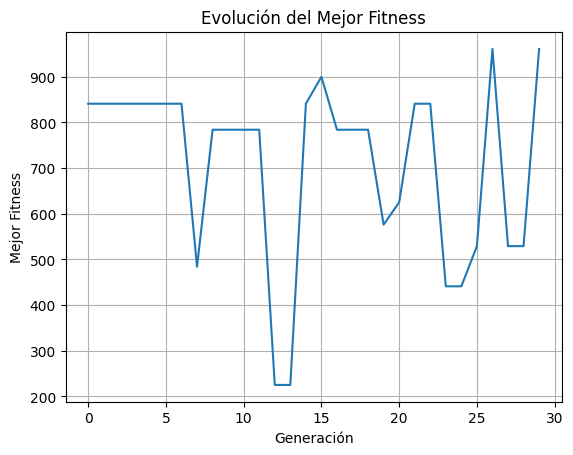

In [15]:
import random
import matplotlib.pyplot as plt

# Parámetros
BITS = 5
POP_SIZE = 3
MUT_PROB = 0.2
GENERATIONS = 30

def random_individual():
    """
    Genera un individuo aleatorio representado como una lista de bits.

    Returns:
        List[int]: Lista de longitud BITS con valores 0 o 1 representando un individuo.
    """
    return [random.randint(0, 1) for _ in range(BITS)]
def decode(individual):
    """
    Decodifica un individuo binario a su valor decimal.

    Args:
        individual (List[int]): Individuo representado como lista de bits.

    Returns:
        int: Valor entero correspondiente a la representación binaria.
    """
    return int("".join(map(str, individual)), 2)
def fitness(individual):
    """
    Evalúa la aptitud de un individuo usando la función f(x) = x^2.

    Args:
        individual (List[int]): Individuo como lista de bits.

    Returns:
        int: Valor de aptitud (fitness), f(x) = x^2.
    """
    x = decode(individual)
    return x ** 2
def tournament_selection(population):
    """
    Realiza selección por torneo binario.

    Args:
        population (List[List[int]]): Población de individuos.

    Returns:
        List[int]: Individuo ganador del torneo (mayor fitness entre dos).
    """
    a, b = random.sample(population, 2)
    return a if fitness(a) > fitness(b) else b
def crossover(parent1, parent2):
    """
    Realiza cruce de un punto entre dos padres.

    Args:
        parent1 (List[int]): Primer padre.
        parent2 (List[int]): Segundo padre.

    Returns:
        Tuple[List[int], List[int]]: Dos hijos generados por cruce.
    """
    point = random.randint(1, BITS - 1)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
def mutate(individual):
    """
    Aplica mutación a un individuo con probabilidad MUT_PROB por bit.

    Args:
        individual (List[int]): Individuo como lista de bits.

    Returns:
        List[int]: Nuevo individuo posiblemente mutado.
    """
    return [bit if random.random() > MUT_PROB else 1 - bit for bit in individual]

# Inicializar población
population = [random_individual() for _ in range(POP_SIZE)]
best_fitness = []
print("Initial population: ",population)
# Evolución
for gen in range(GENERATIONS):
    new_population = []
    for _ in range(POP_SIZE // 2):
        p1 = tournament_selection(population)
        print("p1: ", p1)
        p2 = tournament_selection(population)
        print("p2: ", p2)
        c1, c2 = crossover(p1, p2)
        print("c1: ", c1)
        print("c2: ", c2)
        new_population.extend([mutate(c1), mutate(c2)])
    population = new_population
    print("new_population: ",population)
    best = max(population, key=fitness)
    best_fitness.append(fitness(best))
    print(f"Gen {gen + 1}: Best fitness = {fitness(best)}")

# Graficar evolución
plt.plot(best_fitness)
plt.xlabel("Generación")
plt.ylabel("Mejor Fitness")
plt.title("Evolución del Mejor Fitness")
plt.grid()
plt.show()